# Project Business Statistics: E-news Express



## Problem Statement


An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.


## Objectives
As a hired Data Scientist in E-news Express,I have been assigned the task to decide whether the new landing page is more effective to gather new subscribers.The design team of the company has created a new landing page.I have randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. The following is a statistical analysis of the collected data and answers to the following questions:-

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


### Significance Level
A significance level of 0.05 will be considered for all tests.





## Data dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. 

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [4]:
# write the code for reading the dataset abtest.csv
df=pd.read_csv('abtest.csv')


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [5]:
df.head()
# viewing five rows of the dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.shape
# No of rows and columns

(100, 6)

In [9]:
df.info()
# Viewing the different data types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [10]:
# Converting the 'object' data types columns to 'category' type as this reduces the space used in data storage

df['group']=df['group'].astype('category')
df['landing_page']=df['landing_page'].astype('category')
df['converted']=df['converted'].astype('category')
df['language_preferred']=df['language_preferred'].astype('category')

In [12]:
df.describe()
# Summary of data

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [13]:
# Missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**The are no missing values in the data frame.**

In [19]:
 # Showing the total number of counts in various columns
    
df[['group','landing_page','converted','language_preferred']].apply(pd.Series.value_counts)

,group,landing_page,converted,language_preferred
English,NaN,NaN,NaN,32.0
French,NaN,NaN,NaN,34.0
Spanish,NaN,NaN,NaN,34.0
control,50.0,NaN,NaN,NaN
new,NaN,50.0,NaN,NaN
no,NaN,NaN,46.0,NaN
old,NaN,50.0,NaN,NaN
treatment,50.0,NaN,NaN,NaN
yes,NaN,NaN,54.0,NaN


**Observations**

* There are 100 unique users.
* There are 2 groups - control and treatment. Each group consists of 50 users.
* There are 2 landing_pages - new and old which have equal no of users.
* 54 users get converted and 46 users do not get converted after visiting the landing page.
* There are 3 unique preferred languages - English, French, and Spanish.

### Univariate Analysis

In [24]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


**Time spent on the page**



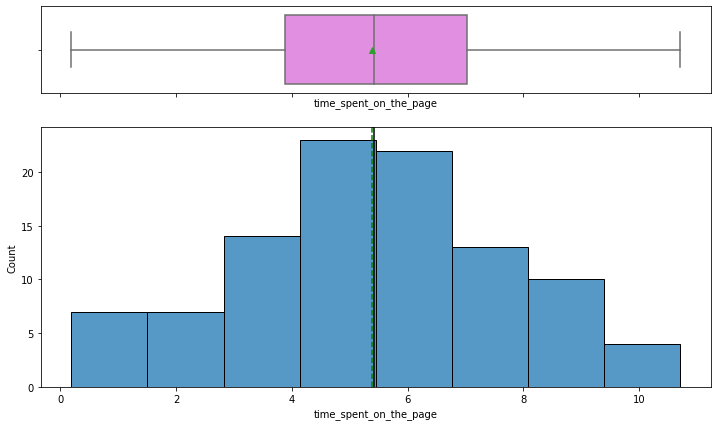

In [25]:
histogram_boxplot(df,"time_spent_on_the_page")


**The time spent on the page has a normal didtribution as the mean and median are alomst the same.**



In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

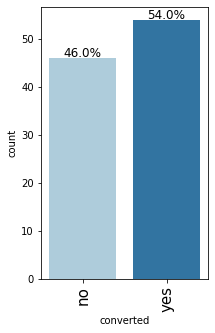

In [31]:
labeled_barplot(df,'converted',perc = True)

**54% of the users get converted and subscribe to the website while 46% of the users do not subcribe.**

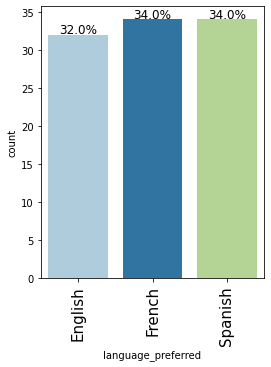

In [32]:
labeled_barplot(df,'language_preferred',perc = True)

**The language prefference is almost equally distributed among English, French and Spanish**

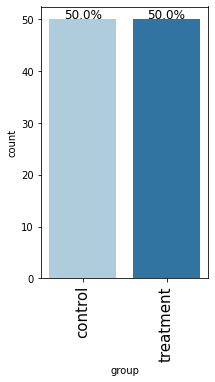

In [33]:
labeled_barplot(df,'group',perc = True)

**The users are divided equally among the control and treatment groups**

### Bivariate Analysis

**Time spent and Converted**

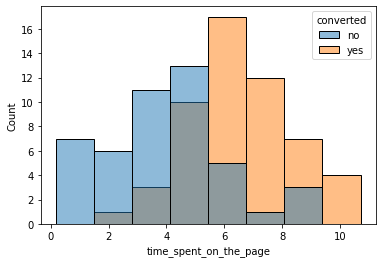

In [41]:
sns.histplot(data=df,x='time_spent_on_the_page',hue='converted')
plt.show()

**The users who subscribed to the portal are the ones who spent more than 5 minutes on the portal.**
**The more time spent on the portal,the higher chance of the user getting converted.**

**Time Spent and The Landing Page**

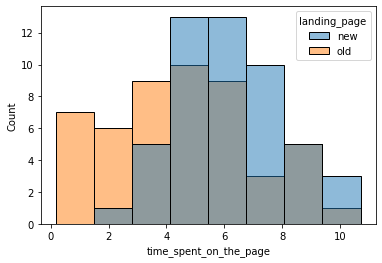

In [62]:
sns.histplot(data=df,x='time_spent_on_the_page',hue='landing_page')
plt.show()

#### Users spent more time on the new landing page compared to the old page.
- The new page is more likely to get the users to subscribe more than the old page as there is a relation between the time spent on the page and the likelyhood of subscribing to the portal.

**Landing Page and Converted**

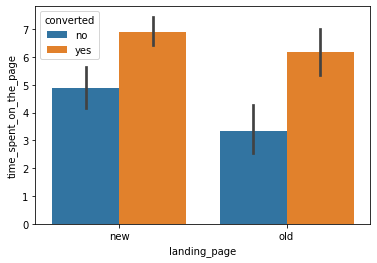

In [48]:
sns.barplot(data=df,y='time_spent_on_the_page',x= 'landing_page', hue='converted')
plt.show()

#### The number of users who subcribed from the new landing page is slightly higher than the users on the old page.


## 2. Do the users spend more time on the new landing page than the existing landing page? 

### Perform Visual Analysis

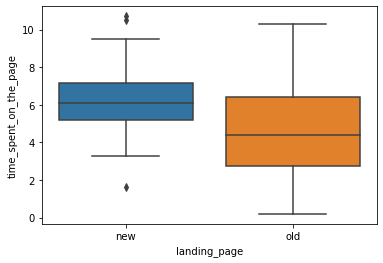

In [58]:
# shows a visual analysis of the relationship between time spent on the old and the new landing page
sns.boxplot(data=df,y='time_spent_on_the_page',x= 'landing_page')
plt.show()


**The users on the new landing page spend more time on the portal than the users on the old landing page.**

### Step 1: Define the null and alternate hypotheses





$H_0:$ The mean time spent on the new landing page is equal to the mean time spent on the old landing page.

$H_a:$ The mean time on the new landing page is greater than the mean time spent on the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the new landing page and the mean time spent on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a one tailed case of two independent population samples where the standard deviation of the populatinon is unknown.Hence the appropriate test is a Two independent sample t-test.

### Step 3: Decide the significance level

#### The significance level is  0.05 as given in the problem statement. Hence α = 0.05.

### Step 4: Collect and prepare data

In [99]:
# Separate the data into time spent on the new landing page and time spent on the old landing page.

new_page_time = df[df['landing_page']=='new']['time_spent_on_the_page']
old_page_time = df[df['landing_page']=='old']['time_spent_on_the_page']

print ('The sample mean time spent on the new landing page is',new_page_time.mean())
print ('The sample mean time spent on the old landing page is',old_page_time.mean())

print ('The sample standard deviation of the time spent on the new landing page is',new_page_time.std())
print ('The sample standard deviation of the time spent on the old landing page is',old_page_time.std())

The sample mean time spent on the new landing page is 6.2232
The sample mean time spent on the old landing page is 4.532400000000001
The sample standard deviation of the time spent on the new landing page is 1.8170310387878263
The sample standard deviation of the time spent on the old landing page is 2.581974849306046


**In order to compare the two sample means,a two independent sample t-test will be conducted to determine the p-value.**

### Step 5: Calculate the p-value

In [126]:
# Imports and the function and calculate the p-value

from scipy.stats import ttest_ind

test_stat, p_value  = ttest_ind(new_page_time, old_page_time ,equal_var = False, alternative = 'greater')
print ('The P-value is',p_value)

The P-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

#### As the p-value is less than 0.05, our signinificance level,we can reject the null hypothesis.
Hence,we do have enough evidence to support the claim that the time spent on the new landing page is more than the time spent on the old landing page.

### Step 7:  Draw inference

#### Statistical evidence shows that users spend more time on the new landing page compared to the old one.Therefore the changes made to the landing page have a significant impact on the users and ultimately would lead to increased subcribers.


## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 

### Perform Visual Analysis

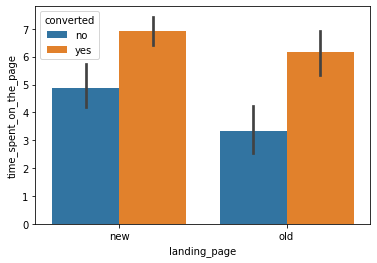

In [104]:
sns.barplot(data=df,y='time_spent_on_the_page',x= 'landing_page', hue='converted')
plt.show()

### Step 1: Define the null and alternate hypotheses


$H_0:$ The proportion of converted users on the new landing page is equal to the proportion of converted users on the  old landing page.

$H_a:$ The proportion of converted users on the new landing page is greater than the proportion of converted users on the old landing page.


Let $p_1,p_2$ be the proportions of converted users who visited the new landing page and those that visted the old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

As this is a one-tailed test concerning two population proportions from two independent populations,the appropriate test will be a Two Proportion Z test.

### Step 3: Decide the significance level

The significance level is  0.05 as given in the problem statement. Hence α = 0.05.

### Step 4: Collect and prepare data

In [119]:
# Find the number of converted users who visited the old and the new landing page.

df_old_converted = df[df['landing_page']=='old']['converted']=='yes'
df_new_converted = df[df['landing_page']=='new']['converted']=='yes'

print('The number of users converted from the old landing page are', df_old_converted.value_counts().loc[True])
print('The number of users converted from the new landing page are', df_new_converted.value_counts().loc[True])

The number of users converted from the old landing page are 21
The number of users converted from the new landing page are 33


The number of converted users is higher in the treatment group that was using the new landing page compared to the same sample size of 50 users accessing the old landing page.

### Step 5: Calculate the p-value

In [124]:
# Import the function proportions Z_test to calculate the P value

from statsmodels.stats.proportion import proportions_ztest

# set the count of converted users
converted_users = np.array([33, 21])

# set the sample sizes
sample_size = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_users, sample_size)
print('The p-value is ' + str(p_value))



The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

 As the p-value is less than 0.05, we may reject the null hypothesis

### Step 7:  Draw inference

We have enough statistical evidence to support the claim that there is a higher conversion rate among the users on the new landing page.
Hence the new landing page has fulfilled its purpose of increasing the number of subscrbers to the E-news Express online portal.

## 4. Is the conversion and preferred language are independent or related? 

### Visual analysis

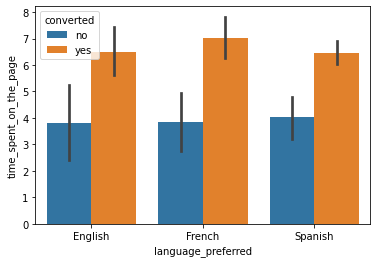

In [182]:
# Shows the relationship between language preferred and conversion
sns.barplot(data=df,y='time_spent_on_the_page',x= 'language_preferred', hue='converted')
plt.show()


**There is only a slight difference between the conversion rate and the language preferred.Further mathematical tests will confirm whether they are independent or related.**

### Step 1: Define the null and alternate hypotheses


We will test the Null hypothesis

>$H_0:$ Conversion rate is independent of preferred langauage.

against the Alternate hypothesis

>$H_a:$ Conversion rate is not independent of preferred langauage.

### Step 2: Select Appropriate test

As this is a case of the test of independence, concerning two categorical variables - converted status and preferred language.The appropriate would be the Chi square test for Indepennce.

### Step 3: Decide the significance level

The significance level is 0.05 as stated in the problem statement.

### Step 4: Collect and prepare data

In [173]:
# Preparing a contingency table

contingency_table = pd.crosstab(df['converted'],df['language_preferred'])  

contingency_table


language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [177]:
# Function to calculate the P value and to import Chi2 contingency function

from scipy.stats import chi2_contingency


# calculate the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value

print('The p-value is', pval)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

As the p-value is greater than the level of significance,we fail to reject the null hypothesis that conversion rate is independent of preferred langauage.


### Step 7:  Draw inference

We have statistically proven that the conversion of users visiting the online portal is independent of their preferred language.


## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Visual analysis

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


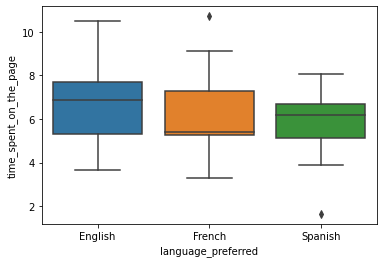

In [160]:
#  To find out the  mean time spent on the new landing page

df_new_page = df[df['landing_page'] == 'new']

print(df_new_page.groupby('language_preferred')['time_spent_on_the_page'].mean())

sns.boxplot(data=df_new_page, y='time_spent_on_the_page',x='language_preferred')
plt.show()

There is a slight difference between the time spent on the page by different language preferrences.The mean time spent by English language users is more than the mean time spent by the French and Spanish users.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for preferred languages, English, French and Spanish respectively.


We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$


against the alternative hypothesis

>$H_a: $ At least one of the mean time is different from the rest.


### Step 2: Select Appropriate test

This is a case of three population means that will require the One way Anova Test. 

Before this test can be done,the normality and variance of the three groups should be verified.
 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis


>$H_0:$ Time spent on the new page follows a normal distribution


against the alternative hypothesis


>$H_a:$ Time spent on the new page does not follow a normal distribution

In [161]:
# Testing for Normality
# To import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = stats.shapiro(df_new_page[df_new_page]) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 0.05 significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal
    

against the alternative hypothesis


>$H_a$: At least one variance is different from the rest

In [163]:
#Checking for the homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="English"], 
                             df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="French"], 
                             df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.


### Step 4: Prepare data and Calculate the p-value

In [170]:
# To import the required function for the anova test
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new_page.loc[df_new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Compare the p-value with $\alpha$

As the p-value is greater than 0.05,the significance level,we fail to reject the null hypothesis.
Hence the mean time spent on the new page by different language users is the same.

### Step 6:  Draw inference

Even though the actual mean times of the different language users are slightly diffrent,we do not have statistical evidence to claim that they are not the same.
Therefore the time spent on the new page by the different language users is the same.

## Conclusion and Business Recommendations


A. The users who subscribed to the E-news Express online portal are the ones who spent at least 5 minutes on the portal.This means that the more the time spent by a user, the more likely they are to subscribe. To capture the users' interest, the design team can :-

  * Make the landing page more intersting by improving the display visuals to be appealing using warm colours or           have banners on the page for breaking news.
  * Introduce pop ups asking a user to subscribe to the online portal after a few minutes of browsing.


B. There is statistical evidence to state that users spent more time on the new landing page and that there is a higher conversion rate of users on the new landing page compared to the old one.

  * This means that the new design of the landing page is effective in increasing subscribers to the E-news Express       online portal and should be adopted as the official page.


C. We have statistically proven that the language preferred and the conversion rate are independent and that the time spent on the new page by different language users is the same.

  * Hence the E-news Express company can effectively continue to provide the three different languages on its online       portal as they are equally popular among the users of the portal.
